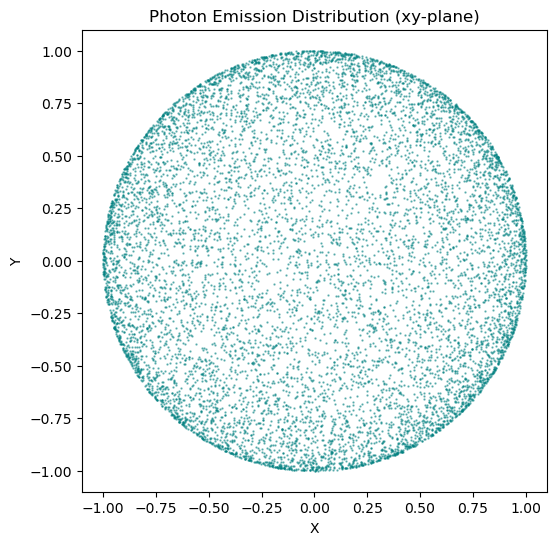

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
num_phot   = 10000  # Number of photons emitted
source_pos = np.array([0, 0, 0])  # Light emitter position (origin)

# Random emission directions (uniform over a sphere)
theta = np.arccos(1 - 2 * np.random.rand(num_phot))  # Polar angle (0 to pi)
phi   = 2 * np.pi * np.random.rand(num_phot)  # Azimuthal angle (0 to 2pi)

# Convert spherical coordinates to Cartesian coordinates (unit vectors)
x_dir = np.sin(theta) * np.cos(phi)
y_dir = np.sin(theta) * np.sin(phi)
z_dir = np.cos(theta)

# Optionally, track the photon paths (e.g., propagate a distance d)
d = 1  # Distance traveled by photons
phot_pos_x = source_pos[0] + d * x_dir
phot_pos_y = source_pos[1] + d * y_dir
phot_pos_z = source_pos[2] + d * z_dir

# Plot photon distribution on a 2D plane (xy-plane projection)
plt.figure(figsize=(6, 6))
plt.scatter(phot_pos_x, phot_pos_y, s=0.5, alpha=0.5, color='teal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Photon Emission Distribution (xy-plane)')
plt.show()

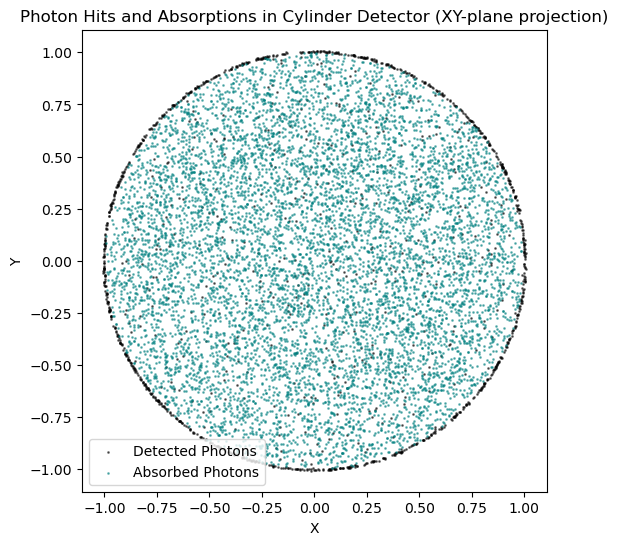

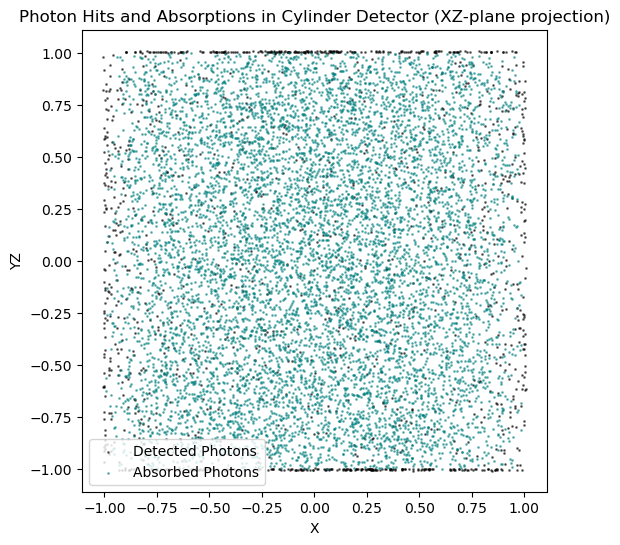

In [8]:
# Constants
num_phot    = 10000  # Number of photons to simulate
cyl_rad     = 1  # Radius of the cylinder detector
cyl_height  = 2  # Height of the cylinder
absort_prob = 0.05  # Probability of absorption per unit distance

# Photon emission from inside the cylinder
def emit_photons_in_cylinder(num_photons, radius, height):
    # Random position inside the cylinder (cylinder coordinates converted to Cartesian)
    r     = radius * np.sqrt(np.random.rand(num_photons))  # radial distance
    theta = 2 * np.pi * np.random.rand(num_photons)  # angular position
    z     = height * (np.random.rand(num_photons) - 0.5)  # height position (centered at 0)
    
    # Cartesian coordinates of emission points
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    
    return x, y, z

# Simulate random emission direction (unit vectors)
def random_emission_directions(num_photons):
    theta = np.arccos(1 - 2 * np.random.rand(num_photons))  # Polar angle
    phi = 2 * np.pi * np.random.rand(num_photons)  # Azimuthal angle
    x_dir = np.sin(theta) * np.cos(phi)
    y_dir = np.sin(theta) * np.sin(phi)
    z_dir = np.cos(theta)
    return x_dir, y_dir, z_dir

# Check if photon hits the detector (stays inside the cylinder)
def photon_hits_detector(x, y, z, x_dir, y_dir, z_dir, radius, height, step=0.01):
    hits     = []
    absorbed = []
    
    for i in range(len(x)):
        absorbed_photon = False
        while True:
            # Move photon by small step
            x[i] += x_dir[i] * step
            y[i] += y_dir[i] * step
            z[i] += z_dir[i] * step
            
            # Check if the photon is outside the cylinder
            if np.sqrt(x[i]**2 + y[i]**2) > radius or abs(z[i]) > height / 2:
                hits.append((x[i], y[i], z[i]))
                break
            
            # Check for absorption
            if np.random.rand() < absort_prob:
                absorbed_photon = True
                absorbed.append((x[i], y[i], z[i]))
                break
    
    return hits, absorbed

# Simulate photon emission and propagation
x, y, z = emit_photons_in_cylinder(num_phot, cyl_rad, cyl_height)
x_dir, y_dir, z_dir = random_emission_directions(num_phot)

# Simulate photon hits and absorption
hits, absorbed = photon_hits_detector(x, y, z, x_dir, y_dir, z_dir, cyl_rad, cyl_height)

# Plot photon hits and absorbed photons
hits = np.array(hits)
absorbed = np.array(absorbed)

plt.figure(figsize=(6, 6))
plt.scatter(hits    [:, 0], hits    [:, 1], s=1, alpha=0.5, label='Detected Photons', color='k')
plt.scatter(absorbed[:, 0], absorbed[:, 1], s=1, alpha=0.5, label='Absorbed Photons', color='teal')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Photon Hits and Absorptions in Cylinder Detector (XY-plane projection)')
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(hits    [:, 0], hits    [:, 2], s=1, alpha=0.5, label='Detected Photons', color='k')
plt.scatter(absorbed[:, 0], absorbed[:, 2], s=1, alpha=0.5, label='Absorbed Photons', color='teal')
plt.xlabel('X')
plt.ylabel('YZ')
plt.legend()
plt.title('Photon Hits and Absorptions in Cylinder Detector (XZ-plane projection)')
plt.show()


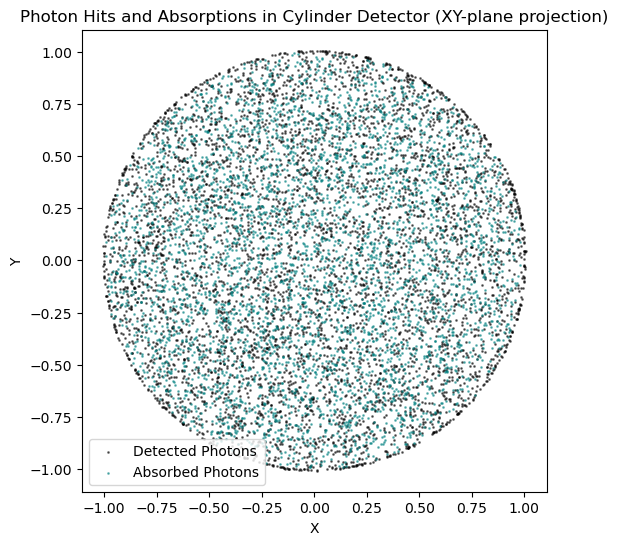

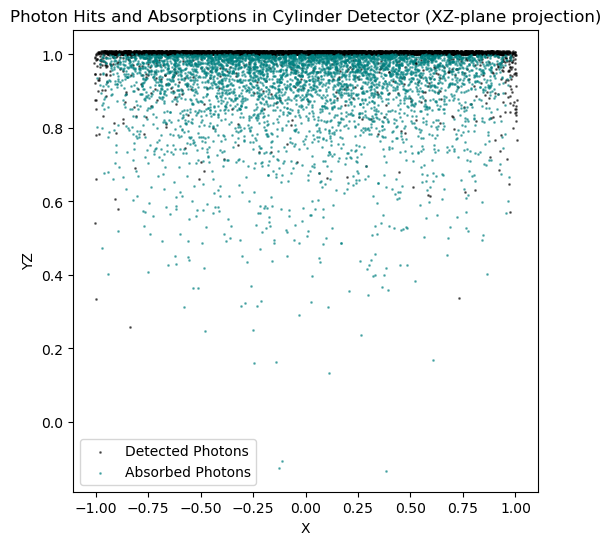

In [12]:
# Constants
num_phot    = 10000  # Number of photons to simulate
cyl_rad     = 1  # Radius of the cylinder detector
cyl_height  = 2  # Height of the cylinder
absort_prob = 0.05  # Probability of absorption per unit distance

# Photon emission from the top of the cylinder
def emit_photons_from_top_of_cylinder(num_photons, radius, height):
    # Random position on the top surface of the cylinder (cylinder coordinates converted to Cartesian)
    r = radius * np.sqrt(np.random.rand(num_photons))  # radial distance
    theta = 2 * np.pi * np.random.rand(num_photons)  # angular position
    z = np.ones(num_photons) * (height / 2)  # z position fixed at the top (z = height / 2)
    
    # Cartesian coordinates of emission points (top surface of the cylinder)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    
    return x, y, z

# Simulate photon emission and propagation from the top of the cylinder
x, y, z = emit_photons_from_top_of_cylinder(num_phot, cyl_rad, cyl_height)
x_dir, y_dir, z_dir = random_emission_directions(num_phot)

# Simulate photon hits and absorption
hits, absorbed = photon_hits_detector(x, y, z, x_dir, y_dir, z_dir, cyl_rad, cyl_height)

# Plot photon hits and absorbed photons
hits = np.array(hits)
absorbed = np.array(absorbed)

plt.figure(figsize=(6, 6))
plt.scatter(hits    [:, 0], hits    [:, 1], s=1, alpha=0.5, label='Detected Photons', color='k')
plt.scatter(absorbed[:, 0], absorbed[:, 1], s=1, alpha=0.5, label='Absorbed Photons', color='teal')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Photon Hits and Absorptions in Cylinder Detector (XY-plane projection)')
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(hits    [:, 0], hits    [:, 2], s=1, alpha=0.5, label='Detected Photons', color='k')
plt.scatter(absorbed[:, 0], absorbed[:, 2], s=1, alpha=0.5, label='Absorbed Photons', color='teal')
plt.xlabel('X')
plt.ylabel('YZ')
plt.legend()
plt.title('Photon Hits and Absorptions in Cylinder Detector (XZ-plane projection)')
plt.show()


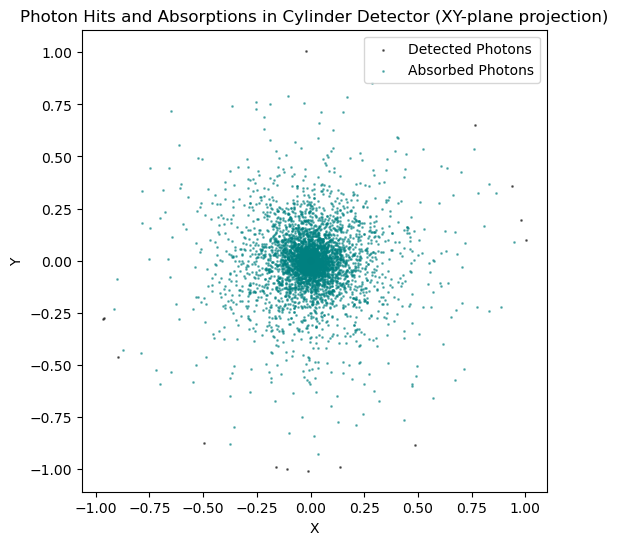

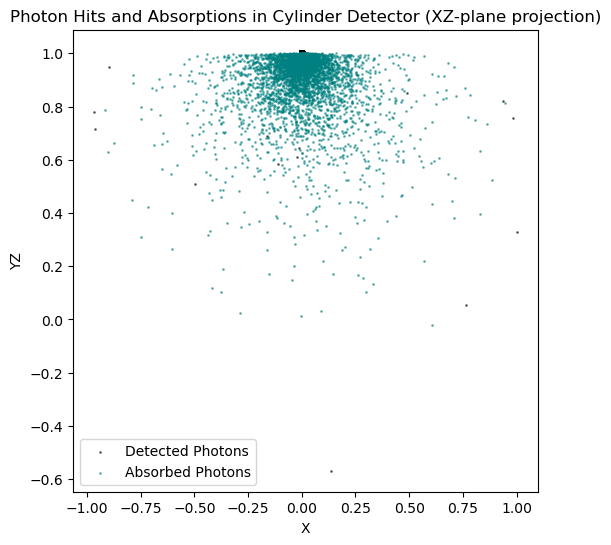

In [15]:
# Constants
num_phot    = 10000  # Number of photons to simulate
cyl_rad     = 1  # Radius of the cylinder detector
cyl_height  = 2  # Height of the cylinder
absort_prob = 0.01  # Probability of absorption per unit distance

# Photon emission from the center of the top of the cylinder
def emit_photons_from_center_top_of_cylinder(num_photons, height):
    # All photons start from the top-center of the cylinder
    x = np.zeros(num_photons)  # x-coordinate of the emission point
    y = np.zeros(num_photons)  # y-coordinate of the emission point
    z = np.ones(num_photons) * (height / 2)  # z-coordinate (top of the cylinder)
    
    return x, y, z

# Simulate photon emission and propagation from the center of the top of the cylinder
x, y, z = emit_photons_from_center_top_of_cylinder(num_phot, cyl_height)
x_dir, y_dir, z_dir = random_emission_directions(num_phot)

# Simulate photon hits and absorption
hits, absorbed = photon_hits_detector(x, y, z, x_dir, y_dir, z_dir, cyl_rad, cyl_height)

# Plot photon hits and absorbed photons
hits = np.array(hits)
absorbed = np.array(absorbed)

plt.figure(figsize=(6, 6))
plt.scatter(hits    [:, 0], hits    [:, 1], s=1, alpha=0.5, label='Detected Photons', color='k')
plt.scatter(absorbed[:, 0], absorbed[:, 1], s=1, alpha=0.5, label='Absorbed Photons', color='teal')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Photon Hits and Absorptions in Cylinder Detector (XY-plane projection)')
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(hits    [:, 0], hits    [:, 2], s=1, alpha=0.5, label='Detected Photons', color='k')
plt.scatter(absorbed[:, 0], absorbed[:, 2], s=1, alpha=0.5, label='Absorbed Photons', color='teal')
plt.xlabel('X')
plt.ylabel('YZ')
plt.legend()
plt.title('Photon Hits and Absorptions in Cylinder Detector (XZ-plane projection)')
plt.show()